# Exploratory Data Analysis for PD Sample 1


In [1]:
import pymongo
from pymongo import MongoClient

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

import plotly.express as px 

#### Connect to MongoDB

In [2]:
client = MongoClient('localhost', 27017)
db = client['pd-sample-1-links']
collection = db.outputItems

In [3]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,url,school_id,depth,images,files
0,622a4bc8c20c51d50ee74153,https://www.ycsoaz.gov/Privacy,635360.0,1,[],[]
1,622a4bc8c20c51d50ee74155,https://forms.newarkpd.com/police-satisfaction...,646671.0,1,[],[]
2,622a4bc8c20c51d50ee74157,https://www.pottercountysheriff.org,650567.0,1,[],[]
3,622a4bc8c20c51d50ee74159,https://www.haywoodncsheriff.com/,648728.0,1,[],[]
4,622a4bc9c20c51d50ee7415b,https://www.capecops.com/find-it,636684.0,1,[],[]


In [4]:
data['school_id'].value_counts()

636684.0    5106
637689.0    1561
645176.0    1214
636658.0     145
639630.0      80
646671.0      55
648868.0      23
650156.0      23
644371.0       3
648728.0       2
635360.0       1
650567.0       1
Name: school_id, dtype: int64

#### Average number of files & images

In [6]:
# data["image_count"] = data["image_urls"].apply(len)
# data["file_count"] = data["file_urls"].apply(len)

In [ ]:
plt.hist(data.depth, bins=np.arange(6.1))

(array([4.807e+03, 3.671e+03, 8.353e+03, 1.460e+02, 1.470e+02, 3.400e+01,
        6.000e+00, 6.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
        65., 70., 75., 80., 85., 90., 95.]),
 <BarContainer object of 19 artists>)

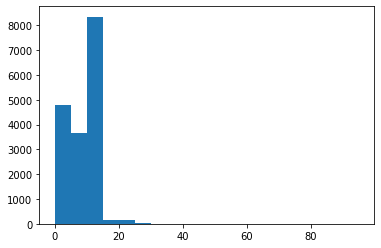

In [11]:
plt.hist(data.image_count, bins=np.arange(0, 95.1, 5))

(array([9603., 6092.,  390.,  298.,  209.,  224.]),
 array([0., 1., 2., 3., 4., 5., 6.]),
 <BarContainer object of 6 artists>)

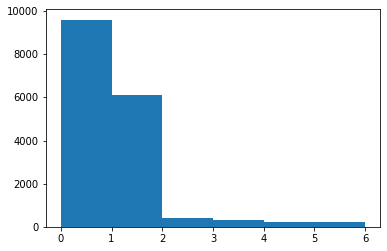

In [12]:
plt.hist(data.file_count, bins=np.arange(6.1))

In [9]:
for d in data['school_id'].unique():
    temp = data[data['school_id']==d]
    
    temp.to_csv(f'../pd-sample-1-links/{int(d)}.csv')